In [3]:
import networkx as nx
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier


In [4]:
df = pd.read_csv("econ-beacxc.mtx", sep=' ')
df.head()

,Source,Target,weight
0,6,1,0.004546
1,7,1,0.245552
2,19,1,0.025518
3,25,1,0.000071
4,63,1,0.006890


In [55]:
G = nx.from_pandas_edgelist(df, "Source", "Target")

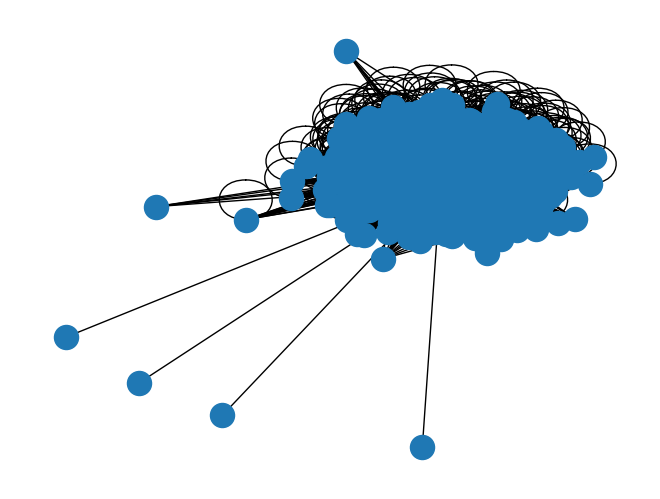

In [56]:
nx.draw(G)

In [57]:
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweeness_centrality = nx.betweenness_centrality(G)

In [5]:
data = pd.read_csv("Data_t.csv")
data = data.drop("Unnamed: 0", axis=1)
data.head()

,degree,closeness,betwennes,influence
0,0.013599,0.420360,0.000375,0.0
1,0.000186,0.295970,0.000000,0.0
2,0.413376,0.619361,0.018321,1.0
3,0.435358,0.629899,0.020473,1.0
4,0.178651,0.506224,0.003627,0.0


In [59]:
for d, c, b in zip(list(degree_centrality.values()),list(closeness_centrality.values()),list(betweeness_centrality.values())):
    included = [d,c,b, (d+c+b)/3]
    data.loc[len(data)] = included
print(type(included))
data.head()

<class 'list'>


,degree,closeness,betwennes,influence
0,0.205703,0.556059,0.000129,0.253963
1,0.236253,0.566975,0.000164,0.267797
2,0.236253,0.565668,0.000168,0.267363
3,0.574338,0.699430,0.002255,0.425341
4,0.549898,0.687675,0.002302,0.413292


In [61]:
avg_influence = data['influence'].mean()
data.loc[data['influence'] >=2*avg_influence , 'influence'] = 1
data.loc[data['influence'] <2*avg_influence , 'influence'] = 0

In [62]:
data.head()

,degree,closeness,betwennes,influence
0,0.205703,0.556059,0.000129,0.0
1,0.236253,0.566975,0.000164,0.0
2,0.236253,0.565668,0.000168,0.0
3,0.574338,0.699430,0.002255,0.0
4,0.549898,0.687675,0.002302,0.0


In [6]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [8]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [9]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([0., 0., 0., ..., 0., 0., 0.])

In [11]:
max(y_pred_en)

1.0

In [12]:
from sklearn.metrics import accuracy_score

print ("Accuracy is "), accuracy_score(y_test,y_pred_en)*100

Accuracy is 


(None, 100.0)

In [13]:
df_test = pd.read_csv("Data.csv")
df_test.head()

,Unnamed: 0.1,Unnamed: 0,degree,closeness,betwennes,influence
0,0,0,0.085686,0.353312,1.461432e-01,1.0
1,1,1,0.002476,0.261241,7.595021e-08,0.0
2,2,2,0.004210,0.261376,1.700964e-06,0.0
3,3,3,0.002476,0.261241,1.840332e-07,0.0
4,4,4,0.003219,0.261308,2.220416e-06,0.0


In [14]:
Xt = df_test.iloc[:,2:-1].values
Yt = df_test.iloc[:,-1].values

yp = clf_entropy.predict(Xt)
print ("Accuracy is "), accuracy_score(Yt,yp)*100

Accuracy is 


(None, 90.02228274325329)

In [18]:
G = nx.from_pandas_edgelist(df, "Source", "Target")

In [19]:
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweeness_centrality = nx.betweenness_centrality(G)

In [30]:
data = pd.DataFrame({"degree":[], "closeness":[], "betwennes":[], "Influence":[]})

In [31]:
for d, c, b in zip(list(degree_centrality.values()),list(closeness_centrality.values()),list(betweeness_centrality.values())):
    included = [d,c,b, (d+c+b)/3]
    data.loc[len(data)] = included
data.head()

,degree,closeness,betwennes,Influence
0,0.205703,0.556059,0.000129,0.253963
1,0.236253,0.566975,0.000164,0.267797
2,0.236253,0.565668,0.000168,0.267363
3,0.574338,0.699430,0.002255,0.425341
4,0.549898,0.687675,0.002302,0.413292


In [15]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [23]:
y_t = clf_entropy.predict(X_t)
y_t

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0.

In [43]:
print(len(data))

492


In [70]:
len(data[data["influence"] == 1])

12

In [16]:
d_t = pd.read_csv("Data.csv")
#d_t = d_t.drop("Unnamed: 0", axis=1)
d_t.head()

,Unnamed: 0.1,Unnamed: 0,degree,closeness,betwennes,influence
0,0,0,0.085686,0.353312,1.461432e-01,1.0
1,1,1,0.002476,0.261241,7.595021e-08,0.0
2,2,2,0.004210,0.261376,1.700964e-06,0.0
3,3,3,0.002476,0.261241,1.840332e-07,0.0
4,4,4,0.003219,0.261308,2.220416e-06,0.0


In [20]:
X_t = d_t.iloc[:,2:-1].values

In [21]:
def Scaling(X):
    scaler = StandardScaler()
    X=scaler.fit_transform(X)
    return X
X_t = Scaling(X_t)

In [22]:
y_t = clf_entropy.predict(X_t)

In [23]:
y_t

array([1., 0., 0., ..., 0., 0., 0.])

In [24]:
max(y_t)

1.0

In [32]:
from Topsis import Topsis
degree = d_t['degree'].values
closeness = d_t['closeness'].values
betwennes = d_t['betwennes'].values
evaluation_matrix = np.array([0,0,0])
for d, c, b in zip(degree, closeness, betwennes):
    included = [d, c, b]
    included = np.array(included)
    evaluation_matrix = np.vstack((evaluation_matrix, included))
evaluation_matrix = evaluation_matrix[1:]
evaluation_matrix

array([[2.05702648e-01, 5.56058890e-01, 1.28748547e-04],
       [2.36252546e-01, 5.66974596e-01, 1.64374798e-04],
       [2.36252546e-01, 5.65668203e-01, 1.67528384e-04],
       ...,
       [2.03665988e-03, 4.99491353e-01, 0.00000000e+00],
       [2.03665988e-03, 4.99491353e-01, 0.00000000e+00],
       [2.03665988e-03, 4.99491353e-01, 0.00000000e+00]])

In [34]:
weights = [1, 1, 1]

'''
    if higher value is preferred - True
    if lower value is preferred - False
    '''
criterias = np.array([True, True, True])
t = Topsis(evaluation_matrix, weights, criterias)

best = t.calc()

In [25]:
from sklearn.metrics import accuracy_score

print ("Accuracy is "), accuracy_score(best,y_t)*100

Accuracy is 


NameError: name 'best' is not defined